In [1]:
# Add relevant Jupyter notebook extensions
%load_ext autoreload
%autoreload 2

In [2]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['/opt/homebrew/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python312.zip', '/opt/homebrew/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python3.12', '/opt/homebrew/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python3.12/lib-dynload', '', '/Users/jinrhee/.venvs/b1-scientific-computing/lib/python3.12/site-packages', '/Users/jinrhee/Desktop/Oxford/Engineering Science/2024-25/B1 Engineering Computation/Scientific Coding/b1-coding-practical-mt24']


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

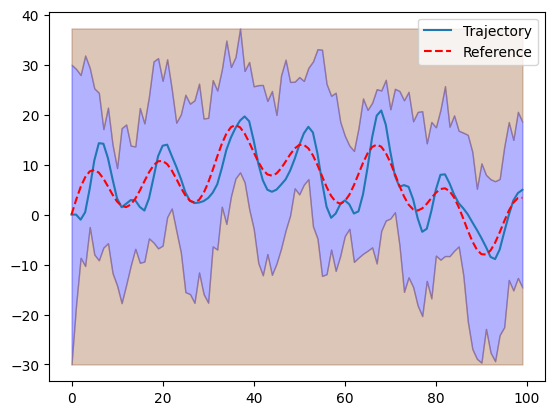

In [2]:
# Import relevant modules
from uuv_mission.control import *
from uuv_mission.dynamic import *
from uuv_mission.terrain import *

sub = Submarine()
controller = Controller()
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("data/mission.csv")
trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

In [24]:
# Test for adjusted gains
kps = np.linspace(-0.05, 0.05, 10) + 0.15
kds = np.linspace(-0.2, 0.2, 10)+ 0.6

iter_num = 100  # times to repeat simulation for each gain combination
mission = Mission.from_csv("data/mission.csv")  # Mission data is reused
sub = Submarine()
controller = Controller()

avg_error_vec = np.empty((0,1))  # Store data from tests
kd_vec = np.empty((0,1))
kp_vec = np.empty((0,1))

for kp in kps:
    for kd in kds:
        error = 0
        for _ in range(iter_num):
            controller.set_prev_error(0)  # Reset controller
            controller.set_gains(kp, kd)

            closed_loop = ClosedLoop(sub, controller)  # Set loop and simulate
            trajectory = closed_loop.simulate_with_random_disturbances(mission)
            error = error + trajectory.get_traj_error(mission)  # Accumulate error
            
        avg_error = error / iter_num
        avg_error_vec = np.append(avg_error_vec, avg_error)
        kp_vec = np.append(kp_vec, kp)
        kd_vec = np.append(kd_vec, kd)

        message = f"[Kp, Kd]: {kp:.3f} {kd:.3f} error: {avg_error:.3f} over {iter_num} iterations"
        print(message)

idx = np.argmin(avg_error_vec)
message = f"Best gains [Kp, Kd]:{kp_vec[idx]:.3f}, {kd_vec[idx]:.3f} with average error of {avg_error_vec[idx]:.4f}"
print(message)


[Kp, Kd]: 0.100 0.400 error: 46.034 over 100 iterations
[Kp, Kd]: 0.100 0.444 error: 41.891 over 100 iterations
[Kp, Kd]: 0.100 0.489 error: 38.528 over 100 iterations
[Kp, Kd]: 0.100 0.533 error: 36.044 over 100 iterations
[Kp, Kd]: 0.100 0.578 error: 33.601 over 100 iterations
[Kp, Kd]: 0.100 0.622 error: 31.484 over 100 iterations
[Kp, Kd]: 0.100 0.667 error: 30.215 over 100 iterations
[Kp, Kd]: 0.100 0.711 error: 28.964 over 100 iterations
[Kp, Kd]: 0.100 0.756 error: 28.625 over 100 iterations
[Kp, Kd]: 0.100 0.800 error: 28.467 over 100 iterations
[Kp, Kd]: 0.111 0.400 error: 46.367 over 100 iterations
[Kp, Kd]: 0.111 0.444 error: 41.706 over 100 iterations
[Kp, Kd]: 0.111 0.489 error: 38.262 over 100 iterations
[Kp, Kd]: 0.111 0.533 error: 35.642 over 100 iterations
[Kp, Kd]: 0.111 0.578 error: 32.729 over 100 iterations
[Kp, Kd]: 0.111 0.622 error: 31.421 over 100 iterations
[Kp, Kd]: 0.111 0.667 error: 29.821 over 100 iterations
[Kp, Kd]: 0.111 0.711 error: 28.918 over 100 ite